# Dates and date fractions

The purpose of this notebook is to investigate how nearly to *exactly* one day apart our observations are spaced.

If they are nearly always spaced exactly 24 hours, then we should expect strong aliasing to occur around a ~2 day Nyquist frequency (0.5 day^-1). If the typical separation is exactly 24 hours but with occasional missing nights, that wouldn't change things. But if the spacing deviates regularly from 24 hours - if it drifts around by a decent fraction of that - then we might reasonably expect to be sensitive to periods shorter than the Nyquist frequency: it would rather be as if 

This is inspired by [Figure 2 of Rodríguez-Ledesma et al. (2009)](https://www.aanda.org/articles/aa/full_html/2009/30/aa11427-08/aa11427-08.html#figure328), which plots a similar thing. In their case, they are actually observing multiple times per night, and their plot makes that clear; here I am not quite doing that, though trying to suss out how the periods are laid out.

This is in preparation for an analysis of how reliably we might detect periodic signals of various periods (1hr - 100hr), amplitudes, and noise levels.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from wuvars.data.photometry import v1 as phot
from wuvars.data.photometry import v1_grouped as phot_grouped
from wuvars.data.spreadsheet import v1 as spread

Loading WSERV1 photometry data... Grouping... DONE (elapsed time: 29.83s)
Loading WSERV5 photometry data... Grouping... DONE (elapsed time: 2.41s)
Loading WSERV7 photometry data... Grouping... DONE (elapsed time: 2.32s)
Loading WSERV8 photometry data... Grouping... DONE (elapsed time: 1.60s)
Loading WSERV11 photometry data... Grouping... DONE (elapsed time: 3.01s)


In [5]:
from wuvars.analysis.variability_selection import sq0, sq1, sq2

our star id:  44027709754792
92


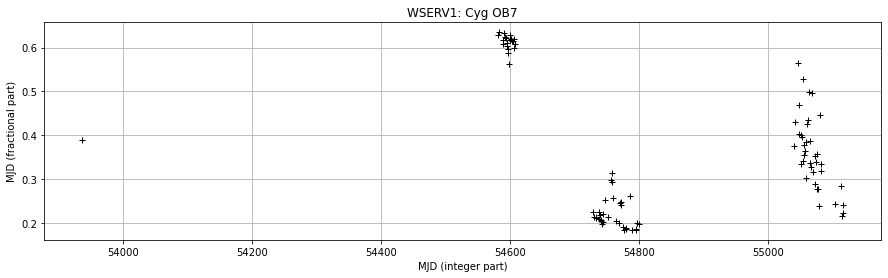

our star id:  44199508455500
80


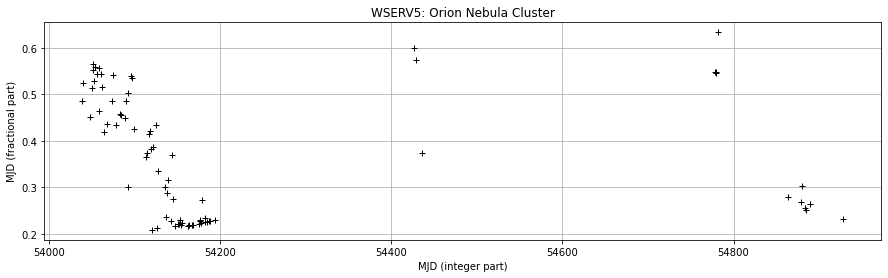

our star id:  44508746089735
142


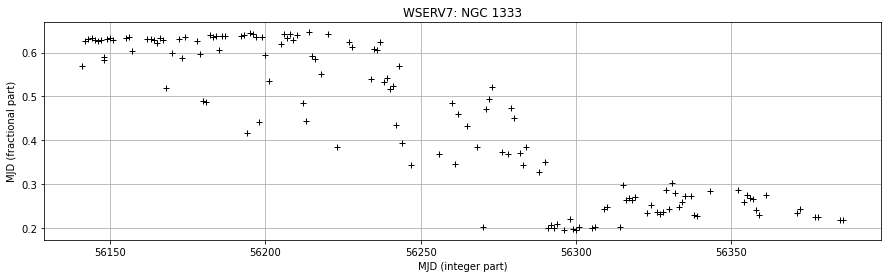

our star id:  44989782427182
70


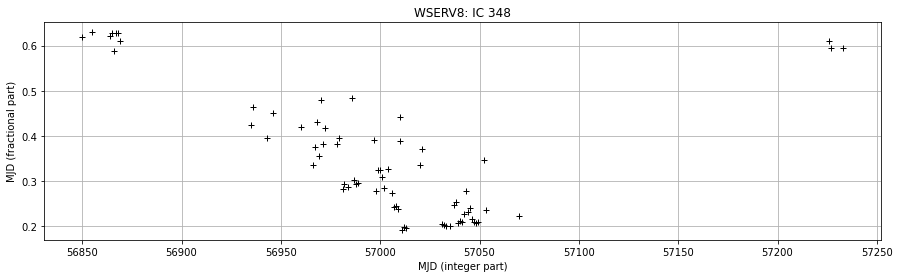

our star id:  45195940856698
87


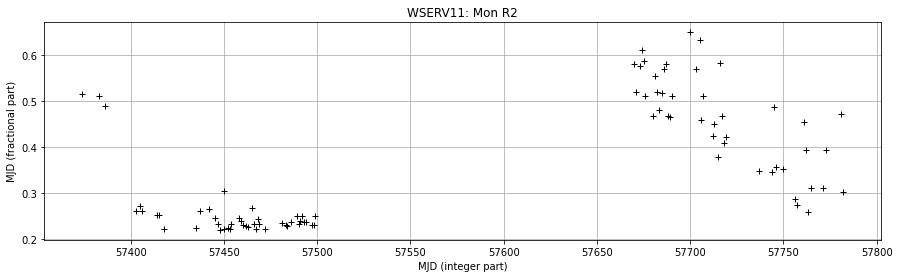

In [50]:
wserv_ids = [1, 5, 7, 8, 11]

# n_obs_list = [130, 120, 171, 85, 110]

n_min_list = [60, 35, 80, 55, 65]
n_max_list = [100, 90, 160, 80, 100]

SFR_names = ["Cyg OB7", "Orion Nebula Cluster", "NGC 1333", "IC 348", "Mon R2"]
SFR_dict = {x: y for x, y in zip(wserv_ids, SFR_names)}

for wserv, n_min, n_max in list(zip(wserv_ids, n_min_list, n_max_list)):
    
    ds = spread[f'wserv{wserv}']
    dg = phot_grouped[f'wserv{wserv}']

    q0 = sq0(ds, n_min, n_max)
    q1 = sq1(ds, n_min, n_max)
    q2 = sq2(ds, n_min, n_max)
    
    # pick some star

#     print(q2)
#     print(q2[q2])
#     print(q2[q2].index[0])
    
    our_star_id = q2[q2].index[200]
    print("our star id: ", our_star_id)

    # count its J, H, K observations

#     display(ds[ds.index == our_star_id]['count'])
    
    dat = dg.groups[dg.groups.keys["SOURCEID"] == our_star_id]
    

    
#     plt.hist(dat['KAPERMAG3'], bins=1)

    k_dates = dat['MEANMJDOBS'][~np.isnan(dat['KAPERMAG3'])]
    
    print(len(k_dates))
    
    date_int = np.floor(k_dates)
    date_frac = k_dates % 1
    
    plt.figure(figsize=(15,4))
    plt.plot(date_int, date_frac, 'k+')
    plt.title(f"WSERV{wserv}: {SFR_dict[wserv]}")
    plt.xlabel("MJD (integer part)")
    plt.ylabel("MJD (fractional part)")
    plt.grid()
    plt.show()
    
#     display(dat)
    
    


our star id:  44027709754792
92
our star id:  44199508455500
80
our star id:  44508746089735
142
our star id:  44989782427182
70
our star id:  45195940856698
87


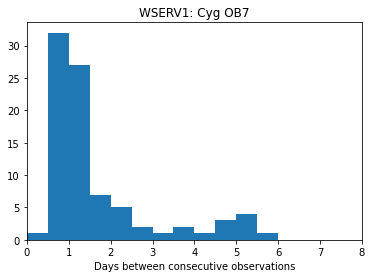

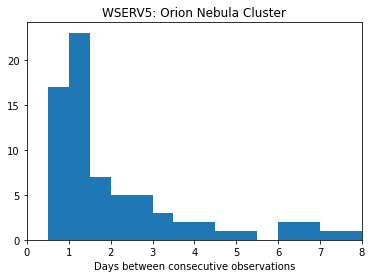

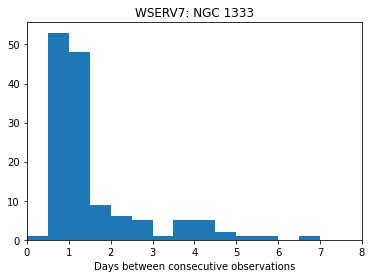

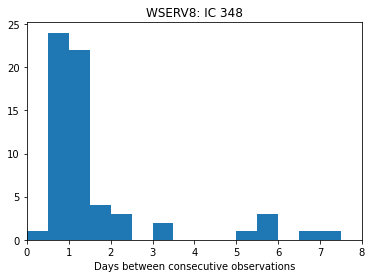

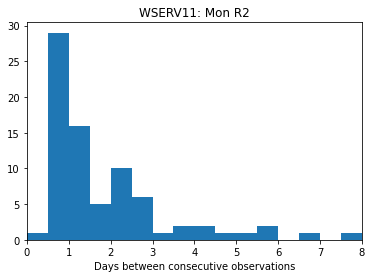

In [48]:
wserv_ids = [1, 5, 7, 8, 11]

# n_obs_list = [130, 120, 171, 85, 110]

n_min_list = [60, 35, 80, 55, 65]
n_max_list = [100, 90, 160, 80, 100]

SFR_names = ["Cyg OB7", "Orion Nebula Cluster", "NGC 1333", "IC 348", "Mon R2"]
SFR_dict = {x: y for x, y in zip(wserv_ids, SFR_names)}

for wserv, n_min, n_max in list(zip(wserv_ids, n_min_list, n_max_list)):
    
    ds = spread[f'wserv{wserv}']
    dg = phot_grouped[f'wserv{wserv}']

    q0 = sq0(ds, n_min, n_max)
    q1 = sq1(ds, n_min, n_max)
    q2 = sq2(ds, n_min, n_max)
    
    # pick some star

#     print(q2)
#     print(q2[q2])
#     print(q2[q2].index[0])
    
    our_star_id = q2[q2].index[200]
    print("our star id: ", our_star_id)

    # count its J, H, K observations

#     display(ds[ds.index == our_star_id]['count'])
    
    dat = dg.groups[dg.groups.keys["SOURCEID"] == our_star_id]
    

    
#     plt.hist(dat['KAPERMAG3'], bins=1)

    k_dates = dat['MEANMJDOBS'][~np.isnan(dat['KAPERMAG3'])]
    
    print(len(k_dates))
    
    date_separation = k_dates[1:] - k_dates[:-1]
    
    plt.figure()
    plt.hist(date_separation, range=(0,10), bins=20)
    plt.xlim(0,8)
        
#     plt.figure(figsize=(15,4))
#     plt.plot(date_int, date_frac, 'k+')
#     plt.title(f"WSERV{wserv}: {SFR_dict[wserv]}")
#     plt.xlabel("MJD (integer part)")
#     plt.ylabel("MJD (fractional part)")
#     plt.grid()
#     plt.show()
    
#     display(dat)
    plt.title(f"WSERV{wserv}: {SFR_dict[wserv]}")
    plt.xlabel("Days between consecutive observations")
    
